In [3]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import patches

from astropy import coordinates
from astropy import units as u
from astropy.io import fits

from shapely import geometry
from shapely.ops import unary_union
from shapely.geometry import Point
from descartes.patch import PolygonPatch

from skipper import observe

### import tiliing file

In [4]:
hdul = fits.open('../data/decam-tiles-decals-merian.fits')
data = hdul[1].data
tileID = data['TILEID']
pass_num = data['PASS']
ra = data['RA']
dec = data['DEC']
circle_radius = (3.18/np.pi)**0.5

### import the GAMA09 field edge

In [5]:
g09edges = np.loadtxt('../data/g09edge.dat')
poly_g09 = geometry.Polygon(g09edges)  

OSError: ../data/g09edge.dat not found.

In [6]:
patch1 = PolygonPatch(poly_g09, edgecolor='k',facecolor='none',lw=1)
fig = plt.figure(1, figsize=(10, 4), dpi=180)
ax = fig.add_subplot(111)
ax.add_patch(patch1)
ax.set_xlim(120,160)
ax.set_ylim(-3,6)

NameError: name 'poly_g09' is not defined

### check the overlap between circles and the HSC footprint


In [5]:
ra1 = [ra[i] for i in range(len(ra)) if pass_num[i] == 1]
dec1 = [dec[i] for i in range(len(dec)) if pass_num[i] == 1]

ra2 = [ra[i] for i in range(len(ra)) if pass_num[i] == 2]
dec2 = [dec[i] for i in range(len(dec)) if pass_num[i] == 2]

ra3 = [ra[i] for i in range(len(ra)) if pass_num[i] == 3]
dec3 = [dec[i] for i in range(len(dec)) if pass_num[i] == 3]

ra4 = [ra[i] for i in range(len(ra)) if pass_num[i] == 4]
dec4 = [dec[i] for i in range(len(dec)) if pass_num[i] == 4]

### first we create a union of all of the circles in pass 1 so we won't count twice an area that overlaps between two circles and the HSC footprint

In [6]:
# # shift circle centers
# dec_shift = 0.8

In [7]:
# # pass 1
# circles_pass1 = [geometry.Point(ra1[i],dec1[i] + dec_shift).buffer(circle_radius) for i in range(len(ra1))]
# all_circles_pass1 = unary_union(circles_pass1)

In [8]:
# pass 1
circles_pass1 = [Point(ra1[i],dec1[i]).buffer(circle_radius) for i in range(len(ra1))]
all_circles_pass1 = unary_union(circles_pass1)
# pass 2
circles_pass2 = [Point(ra2[i],dec2[i]).buffer(circle_radius) for i in range(len(ra2))]
all_circles_pass2 = unary_union(circles_pass2)
# pass 3
circles_pass3 = [Point(ra3[i],dec3[i]).buffer(circle_radius) for i in range(len(ra3))]
all_circles_pass3 = unary_union(circles_pass3)
# pass 4
circles_pass4 = [Point(ra4[i],dec4[i]).buffer(circle_radius) for i in range(len(ra4))]
all_circles_pass4 = unary_union(circles_pass4)

### now we calculate the overlap of pass1 with the HSC GAMA09 area

In [30]:
# pass 1
pass1_circle_any_overlap = []
pass1_circle_overlap_index = []
fov_area = 3.18
fraction = 0.5
for i in range(len(circles_pass1)):
    inter = poly_g09.intersection(circles_pass1[i])
    if inter.area > 0:
        pass1_circle_any_overlap.append(circles_pass1[i])
        if inter.area/3.18 > fraction:
            pass1_circle_overlap_index.append(1)
        else:
            pass1_circle_overlap_index.append(0)

# pass 2
pass2_circle_any_overlap = []
pass2_circle_overlap_index = []
fov_area = 3.18
for i in range(len(circles_pass2)):
    inter = poly_g09.intersection(circles_pass2[i])
    if inter.area > 0:
        pass2_circle_any_overlap.append(circles_pass2[i])
        if inter.area/3.18 > fraction:
            pass2_circle_overlap_index.append(1)
        else:
            pass2_circle_overlap_index.append(0)
            
# pass 3
pass3_circle_any_overlap = []
pass3_circle_overlap_index = []
fov_area = 3.18
for i in range(len(circles_pass3)):
    inter = poly_g09.intersection(circles_pass3[i])
    if inter.area > 0:
        pass3_circle_any_overlap.append(circles_pass3[i])
        if inter.area/3.18 > fraction:
            pass3_circle_overlap_index.append(1)
        else:
            pass3_circle_overlap_index.append(0)     

# pass 4
pass4_circle_any_overlap = []
pass4_circle_overlap_index = []
fov_area = 3.18
for i in range(len(circles_pass4)):
    inter = poly_g09.intersection(circles_pass4[i])
    if inter.area > 0:
        pass4_circle_any_overlap.append(circles_pass4[i])
        if inter.area/3.18 > fraction:
            pass4_circle_overlap_index.append(1)
        else:
            pass4_circle_overlap_index.append(0)            

Text(0.5, 1.0, 'fraction outside G09 field: 0.5')

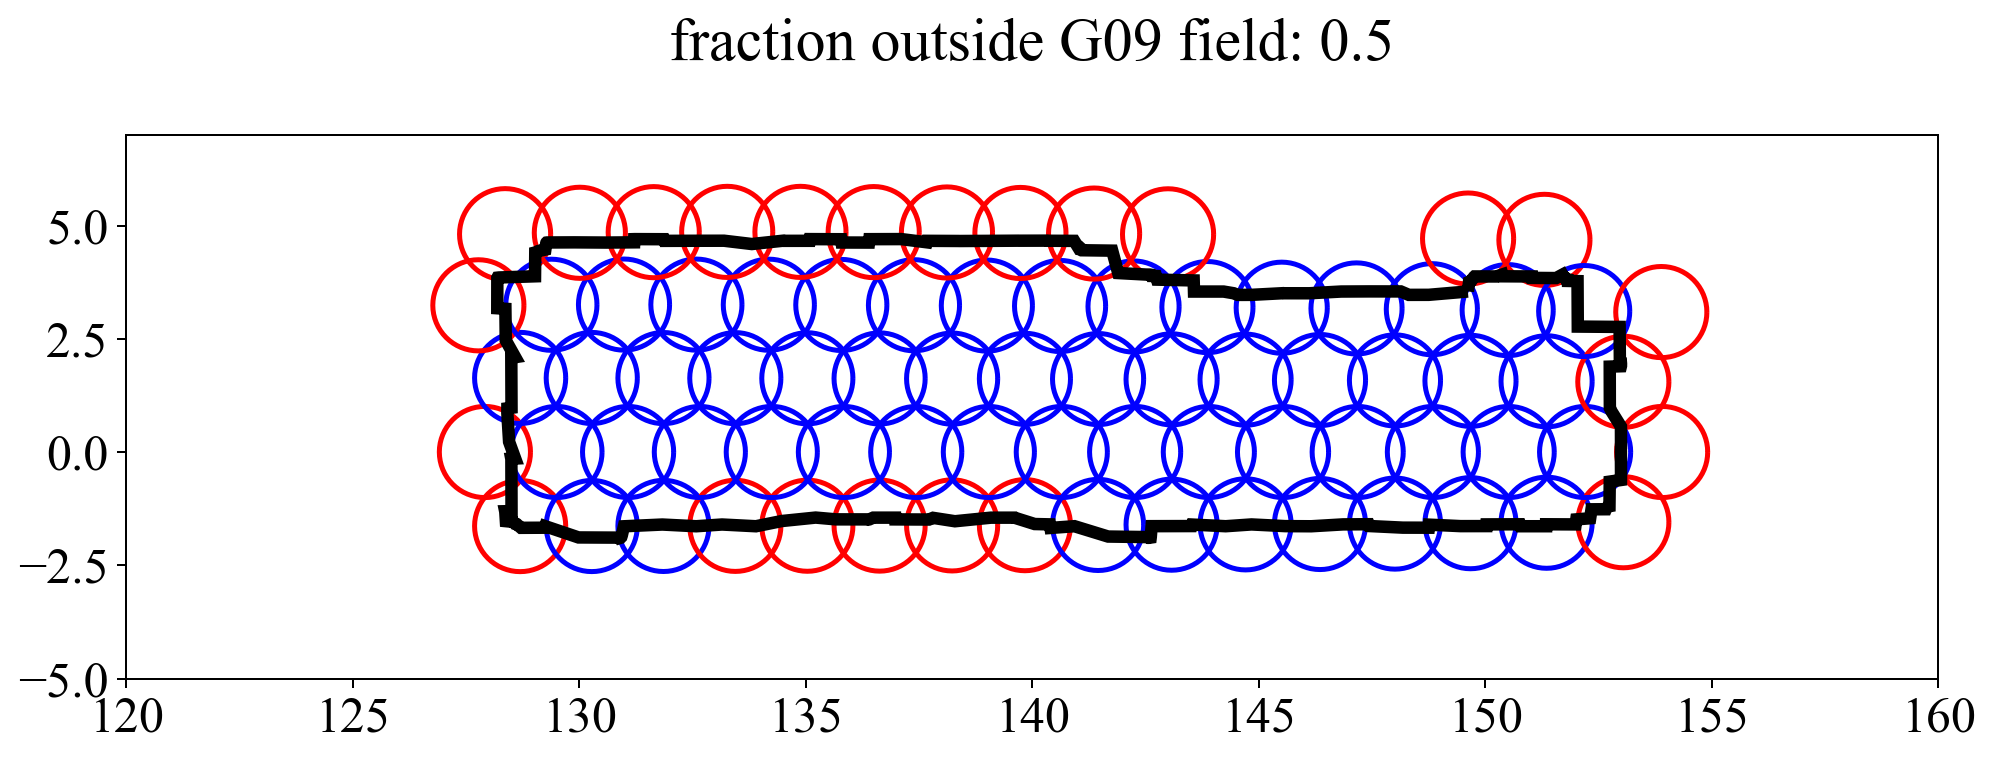

In [31]:
fig = plt.figure(1, figsize=(15,4), dpi=180)
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] = 20
plt.rcParams['axes.titlepad'] = 30

ax = fig.add_subplot(111, aspect='equal')
patch1 = PolygonPatch(poly_g09, edgecolor='k',facecolor='none',lw=5)
for i in range(len(pass1_circle_any_overlap)):
    if pass1_circle_overlap_index[i] == 1:
        patch2 = PolygonPatch(pass1_circle_any_overlap[i],lw=2,facecolor='none',edgecolor='b')
    else:
        patch2 = PolygonPatch(pass1_circle_any_overlap[i],lw=2,facecolor='none',edgecolor='r')
    ax.add_patch(patch2)
ax.add_patch(patch1)
ax.set_xlim(120,160)
ax.set_ylim(-5,7)
plt.title('fraction outside G09 field: '+str(fraction))


In [32]:
# # pass 1
# circles_pass1 = [geometry.Point(ra1[i],dec1[i]).buffer(circle_radius) for i in range(len(ra1))]
# all_circles_pass1 = unary_union(circles_pass1)
# # pass 2
# circles_pass2 = [Point(ra2[i],dec2[i]).buffer(circle_radius) for i in range(len(ra2))]
# all_circles_pass2 = unary_union(circles_pass2)
# # pass 3
# circles_pass3 = [Point(ra3[i],dec3[i]).buffer(circle_radius) for i in range(len(ra3))]
# all_circles_pass3 = unary_union(circles_pass3)
# # pass 4
# circles_pass4 = [Point(ra4[i],dec4[i]).buffer(circle_radius) for i in range(len(ra4))]
# all_circles_pass4 = unary_union(circles_pass4)

## plot all four passes that overlap with the GAMA09 field

Text(0.5, 1.0, 'fraction outside G09 field: 0.5')

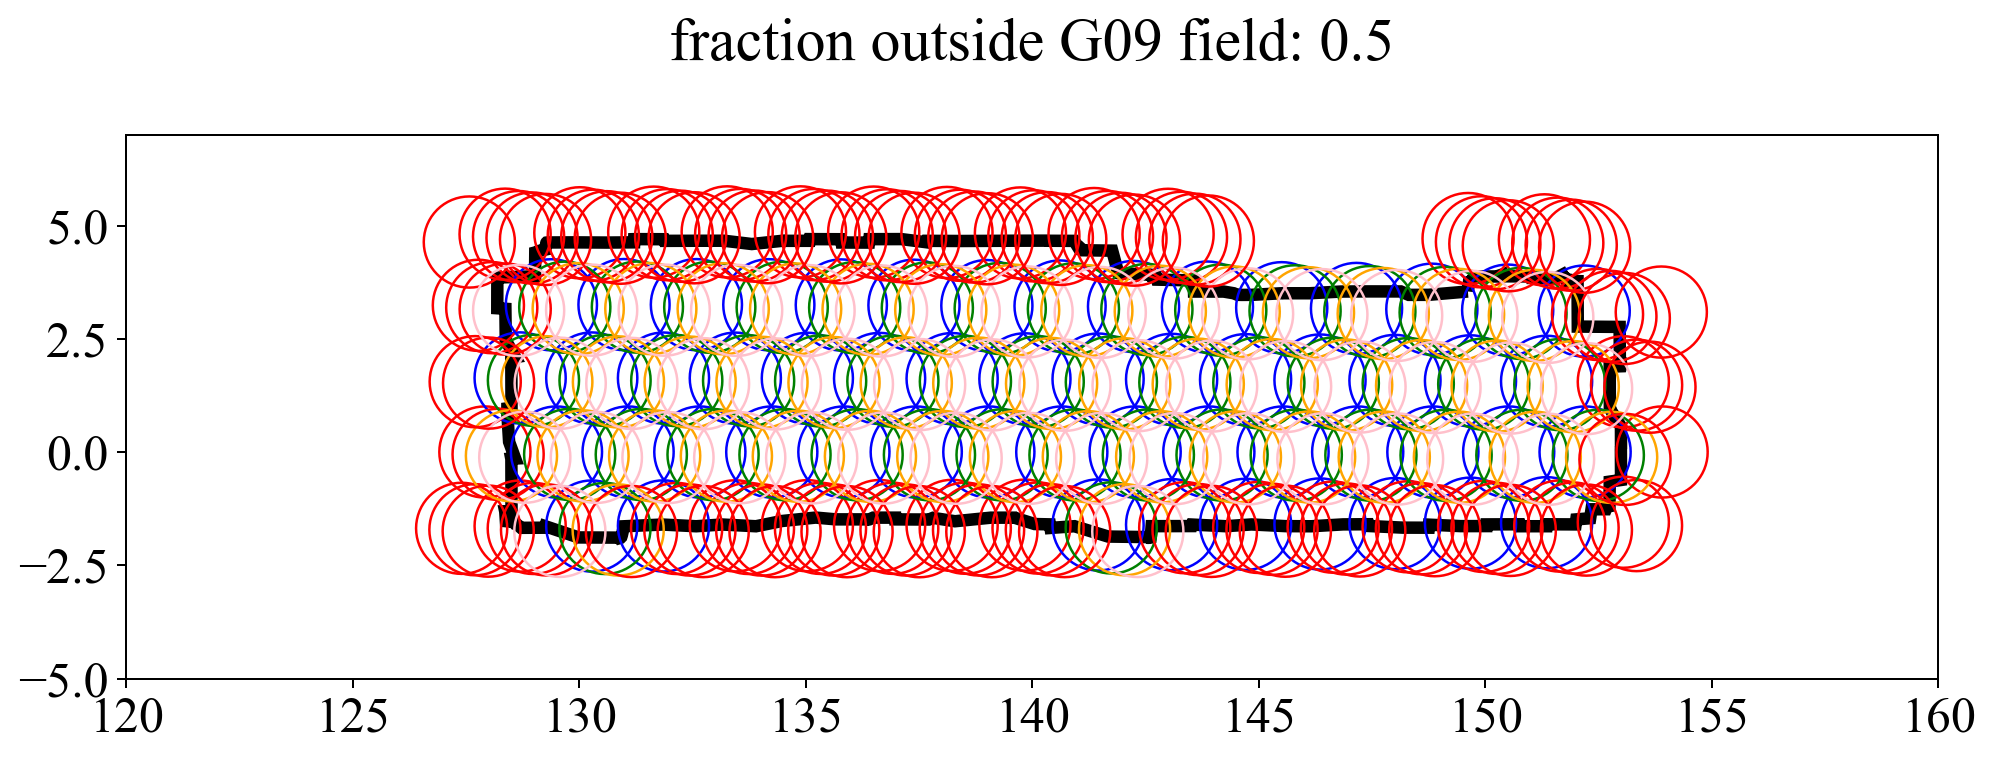

In [33]:
fig = plt.figure(1, figsize=(15,4), dpi=180)
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] = 20
plt.rcParams['axes.titlepad'] = 30

ax = fig.add_subplot(111, aspect='equal')
patch = PolygonPatch(poly_g09, edgecolor='k',facecolor='none',lw=5)
ax.add_patch(patch)

point_counter = 0

# pass 1
for i in range(len(pass1_circle_any_overlap)):
    if pass1_circle_overlap_index[i] == 1:
        patch1 = PolygonPatch(pass1_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='b')
        point_counter += 1        
    else:
        patch1 = PolygonPatch(pass1_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='r')
    ax.add_patch(patch1)
# pass 2
for i in range(len(pass2_circle_any_overlap)):
    if pass2_circle_overlap_index[i] == 1:
        patch2 = PolygonPatch(pass2_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='g')
        point_counter += 1
    else:
        patch2 = PolygonPatch(pass2_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='r')
    ax.add_patch(patch2)
# pass 3
for i in range(len(pass3_circle_any_overlap)):
    if pass3_circle_overlap_index[i] == 1:
        patch3 = PolygonPatch(pass3_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='orange')
        point_counter += 1
    else:
        patch3 = PolygonPatch(pass3_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='r')
    ax.add_patch(patch3)
# pass 4
for i in range(len(pass4_circle_any_overlap)):
    if pass4_circle_overlap_index[i] == 1:
        patch4 = PolygonPatch(pass4_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='pink')
        point_counter += 1
    else:
        patch4 = PolygonPatch(pass4_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='r')
    ax.add_patch(patch4)


ax.set_xlim(120,160)
ax.set_ylim(-5,7)
plt.title('fraction outside G09 field: '+str(fraction))


In [34]:
point_counter

194

Text(0.5, 1.0, 'fraction outside G09 field: 0.3')

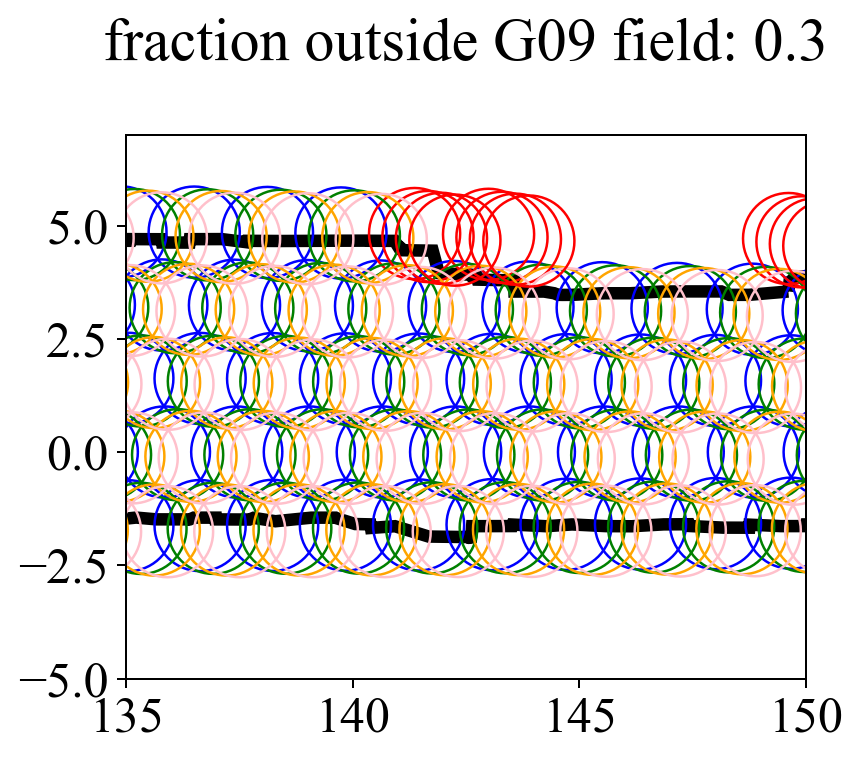

In [28]:
fig = plt.figure(1, figsize=(15,4), dpi=180)
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] = 20
plt.rcParams['axes.titlepad'] = 30

ax = fig.add_subplot(111, aspect='equal')
patch = PolygonPatch(poly_g09, edgecolor='k',facecolor='none',lw=5)
ax.add_patch(patch)
# pass 1
for i in range(len(pass1_circle_any_overlap)):
    if pass1_circle_overlap_index[i] == 1:
        patch1 = PolygonPatch(pass1_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='b')
    else:
        patch1 = PolygonPatch(pass1_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='r')
    ax.add_patch(patch1)
# pass 2
for i in range(len(pass2_circle_any_overlap)):
    if pass2_circle_overlap_index[i] == 1:
        patch2 = PolygonPatch(pass2_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='g')
    else:
        patch2 = PolygonPatch(pass2_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='r')
    ax.add_patch(patch2)
# pass 3
for i in range(len(pass3_circle_any_overlap)):
    if pass3_circle_overlap_index[i] == 1:
        patch3 = PolygonPatch(pass3_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='orange')
    else:
        patch3 = PolygonPatch(pass3_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='r')
    ax.add_patch(patch3)
# pass 4
for i in range(len(pass4_circle_any_overlap)):
    if pass4_circle_overlap_index[i] == 1:
        patch4 = PolygonPatch(pass4_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='pink')
    else:
        patch4 = PolygonPatch(pass4_circle_any_overlap[i],lw=1,facecolor='none',edgecolor='r')
    ax.add_patch(patch4)



ax.set_xlim(135,150)
ax.set_ylim(-5,7)
plt.title('fraction outside G09 field: '+str(fraction))
